# Exploratory Data Analysis (EDA) of the Ames Housing Dataset

## Introduction

The Ames Housing Dataset is a comprehensive record of residential property sales in Ames, Iowa. Compiled by **Dean De Cock**, it includes 2,930 observations with 80 features describing various aspects of residential homes. 

In this notebook, we will perform EDA to understand the data, identify patterns, detect anomalies, and extract insights that could be useful for predictive modeling.

## Objectives

- Understand the structure and content of the dataset.
- Handle missing values appropriately.
- Explore distributions of individual variables.
- Examine relationships between features and the target variable (`SalePrice`).
- Identify key features that influence house prices.

## Dataset Description

Some of the key variables in the dataset include:

- **SalePrice**: The property's sale price in dollars.
- **LotArea**: Lot size in square feet.
- **OverallQual**: Overall material and finish quality (scale from 1 to 10).
- **YearBuilt**: Original construction date.
- **TotalBsmtSF**: Total square feet of the basement area.
- **GrLivArea**: Above-grade (ground) living area square feet.
- **FullBath**: Full bathrooms above grade.
- **GarageCars**: Size of garage in car capacity.
- **GarageArea**: Size of garage in square feet.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ames.csv')

## Exploring the Dataset

### First Five Rows

Let's take a look at the first five rows to get an initial understanding of the data.


In [3]:
# Displaying the first five rows
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,141.0,31770.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,...,0.0,NoPool,NoFence,NaN,0.0,5.0,2010.0,WD,Normal,215000.0
1,20,RH,80.0,11622.0,Pave,NoAccess,Reg,Lvl,AllPub,Inside,...,0.0,NoPool,MnPrv,NaN,0.0,6.0,2010.0,WD,Normal,105000.0
2,20,RL,81.0,14267.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,...,0.0,NoPool,NoFence,Gar2,12500.0,6.0,2010.0,WD,Normal,172000.0
3,20,RL,93.0,11160.0,Pave,NoAccess,Reg,Lvl,AllPub,Corner,...,0.0,NoPool,NoFence,NaN,0.0,4.0,2010.0,WD,Normal,244000.0
4,60,RL,74.0,13830.0,Pave,NoAccess,IR1,Lvl,AllPub,Inside,...,0.0,NoPool,MnPrv,NaN,0.0,3.0,2010.0,WD,Normal,189900.0


In [4]:
# Getting information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2930 non-null   int64  
 1   MSZoning       2930 non-null   object 
 2   LotFrontage    2440 non-null   float64
 3   LotArea        2930 non-null   float64
 4   Street         2930 non-null   object 
 5   Alley          2930 non-null   object 
 6   LotShape       2930 non-null   object 
 7   LandContour    2930 non-null   object 
 8   Utilities      2930 non-null   object 
 9   LotConfig      2930 non-null   object 
 10  LandSlope      2930 non-null   object 
 11  Neighborhood   2930 non-null   object 
 12  Condition1     2930 non-null   object 
 13  Condition2     2930 non-null   object 
 14  BldgType       2930 non-null   object 
 15  HouseStyle     2930 non-null   object 
 16  OverallQual    2930 non-null   int64  
 17  OverallCond    2930 non-null   int64  
 18  YearBuil

In [23]:
# Check column names: No empty space, no dot, no special characters
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

In [6]:
data.rename(columns={'YearRemod.Add':'YearRemodAdd'}, inplace=True)

In [7]:
# Statistical summary
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Checking for Missing Values

Identify the number of missing values in each column.

In [8]:
# Checking for missing values
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values

MiscFeature     2824
MasVnrType      1775
LotFrontage      490
GarageYrBlt      159
MasVnrArea        23
BsmtExposure       4
GarageFinish       2
BsmtFinType2       2
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
GarageQual         1
BsmtQual           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
BsmtFinType1       1
BsmtCond           1
GarageCond         1
Electrical         1
dtype: int64

We can see that some features have missing values. For the purpose of this EDA, we'll focus on handling missing values for the most significant features later on.

## Target Variable Analysis

### Distribution of SalePrice

Let's explore the distribution of the target variable `SalePrice`.


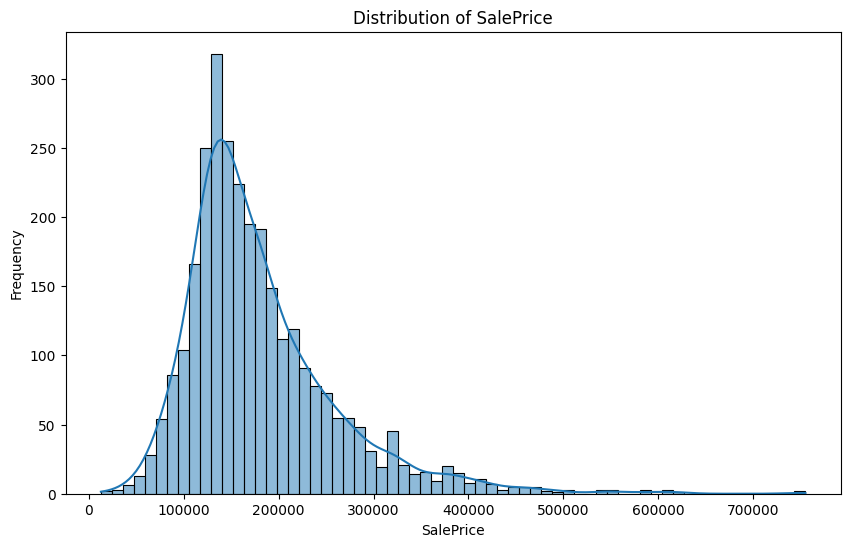

Skewness: 1.743500
Kurtosis: 5.118900


In [9]:
# Plotting the distribution of SalePrice
plt.figure(figsize=(10,6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Calculating skewness and kurtosis
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())


The distribution of `SalePrice` is right-skewed with a skewness of greater than 1. This indicates that we may need to apply a log transformation to normalize it for modeling purposes.


<Figure size 800x600 with 0 Axes>

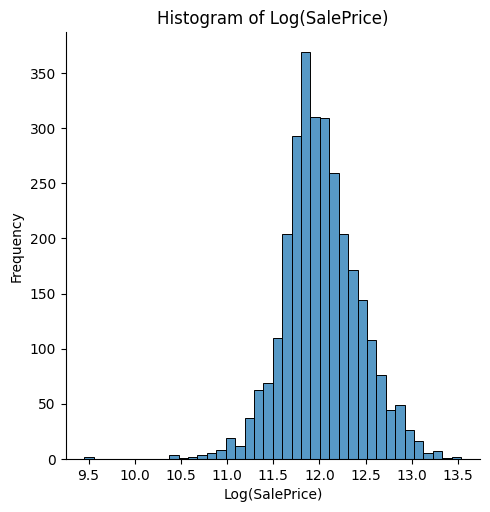

In [10]:
data['LogSalePrice'] = data['SalePrice'].apply(np.log)

plt.figure(figsize=(8,6));
ax = sns.displot(data['LogSalePrice'], bins=40);
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.title('Histogram of Log(SalePrice)');


## Univariate Analysis

### Numerical Features

Let's explore some key numerical features.

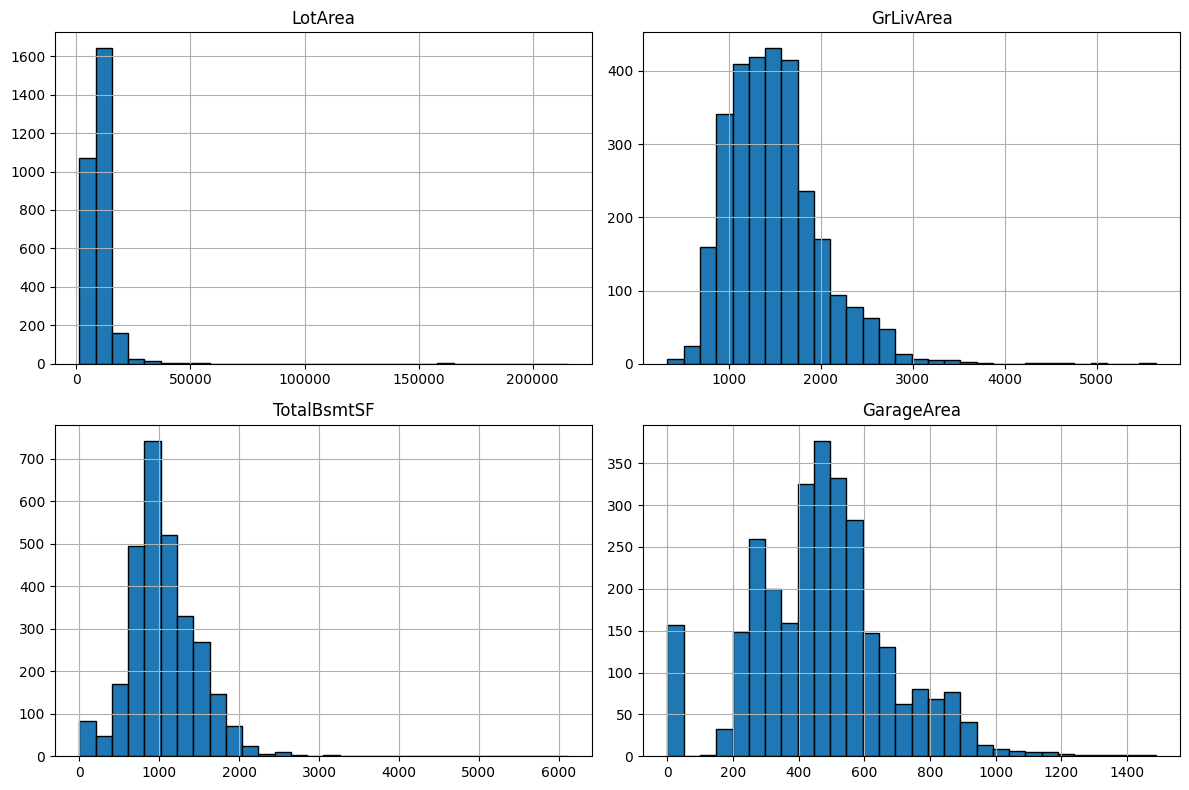

In [11]:
# List of numerical features to analyze
numeric_features = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

# Plotting histograms
data[numeric_features].hist(figsize=(12,8), bins=30, edgecolor='black')
plt.tight_layout()

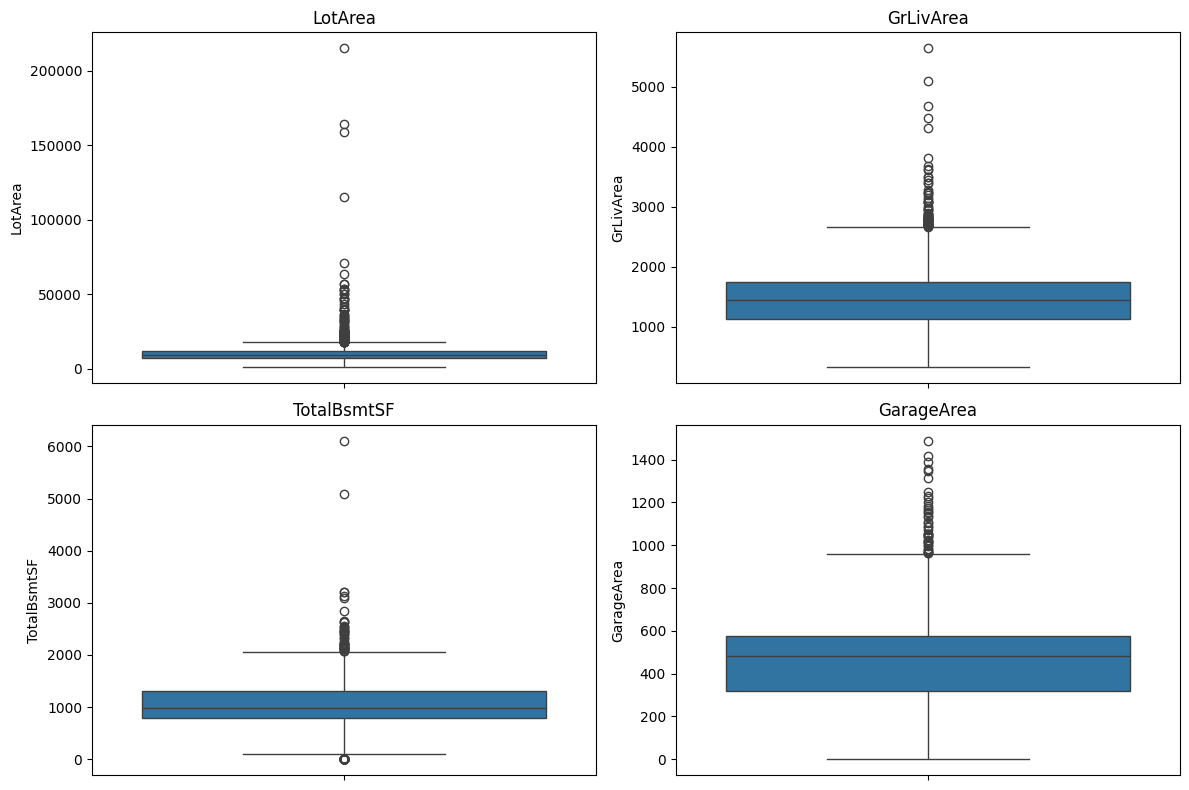

In [12]:
# Box plots for numerical features
plt.figure(figsize=(12,8))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=data[feature])
    plt.title(feature)
plt.tight_layout()

We observe that features like `LotArea` and `GrLivArea` have outliers, which might affect our analysis.

## Bivariate Analysis

### Relationship Between SalePrice and Numerical Features

Let's explore how each numerical feature relates to `SalePrice`.


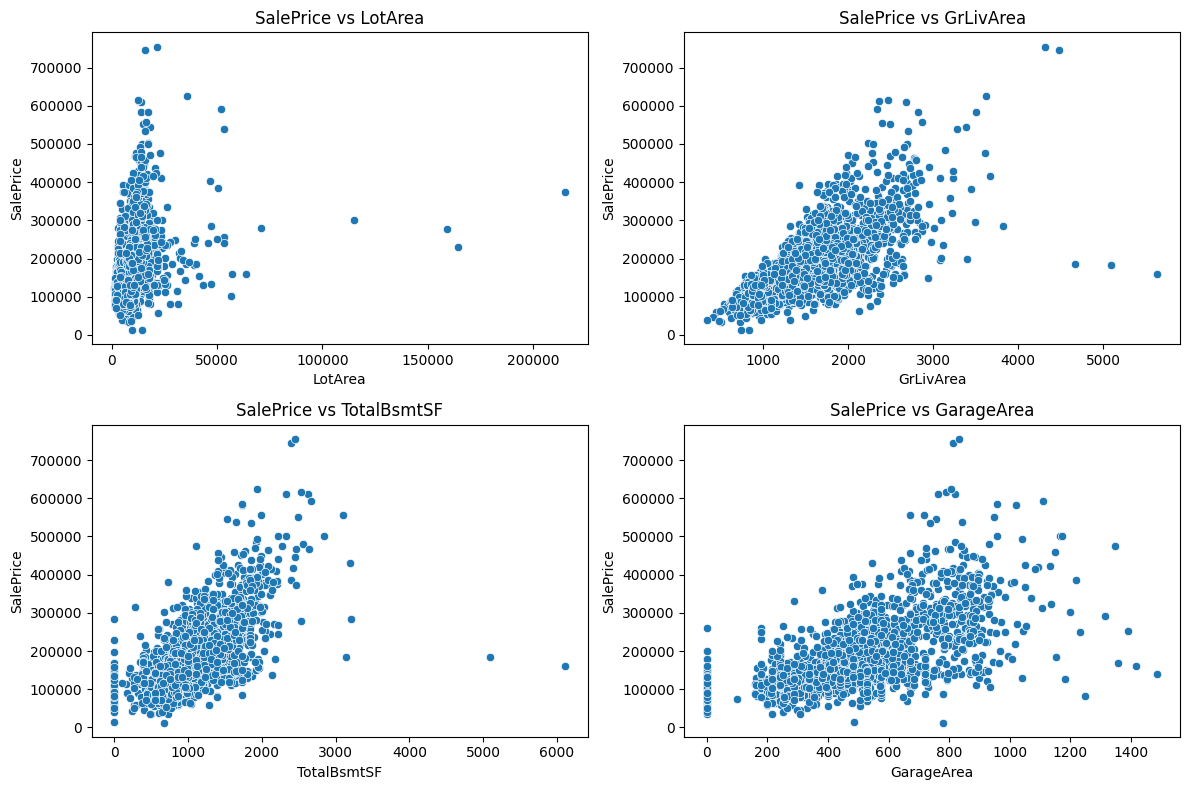

In [13]:
# Scatter plots
plt.figure(figsize=(12,8))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=data[feature], y=data['SalePrice'])
    plt.title(f'SalePrice vs {feature}')
plt.tight_layout()

In [14]:
# Correlation matrix
corr_matrix = data.corr(numeric_only = True)

# Correlation with SalePrice
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
corr_with_saleprice


SalePrice        1.000000
LogSalePrice     0.946303
OverallQual      0.799262
GrLivArea        0.706780
GarageCars       0.647877
GarageArea       0.640401
TotalBsmtSF      0.632280
X1stFlrSF        0.621676
YearBuilt        0.558426
FullBath         0.545604
YearRemodAdd     0.532974
GarageYrBlt      0.526965
MasVnrArea       0.508285
TotRmsAbvGrd     0.495474
Fireplaces       0.474558
BsmtFinSF1       0.432914
LotFrontage      0.357318
WoodDeckSF       0.327143
OpenPorchSF      0.312951
HalfBath         0.285056
BsmtFullBath     0.276050
X2ndFlrSF        0.269373
LotArea          0.266549
BsmtUnfSF        0.182855
BedroomAbvGr     0.143913
ScreenPorch      0.112151
PoolArea         0.068403
MoSold           0.035259
X3SsnPorch       0.032225
BsmtFinSF2       0.005891
MiscVal         -0.015691
YrSold          -0.030569
BsmtHalfBath    -0.035835
LowQualFinSF    -0.037660
MSSubClass      -0.085092
OverallCond     -0.101697
KitchenAbvGr    -0.119814
EnclosedPorch   -0.128787
Name: SalePr

### Top Correlated Features with SalePrice

Identify the features that have strong positive or negative correlation with `SalePrice`.


In [15]:
# Top 10 features correlated with SalePrice
top_features = corr_with_saleprice.index[1:11]
top_features


Index(['LogSalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'X1stFlrSF', 'YearBuilt', 'FullBath', 'YearRemodAdd'],
      dtype='object')

<Axes: >

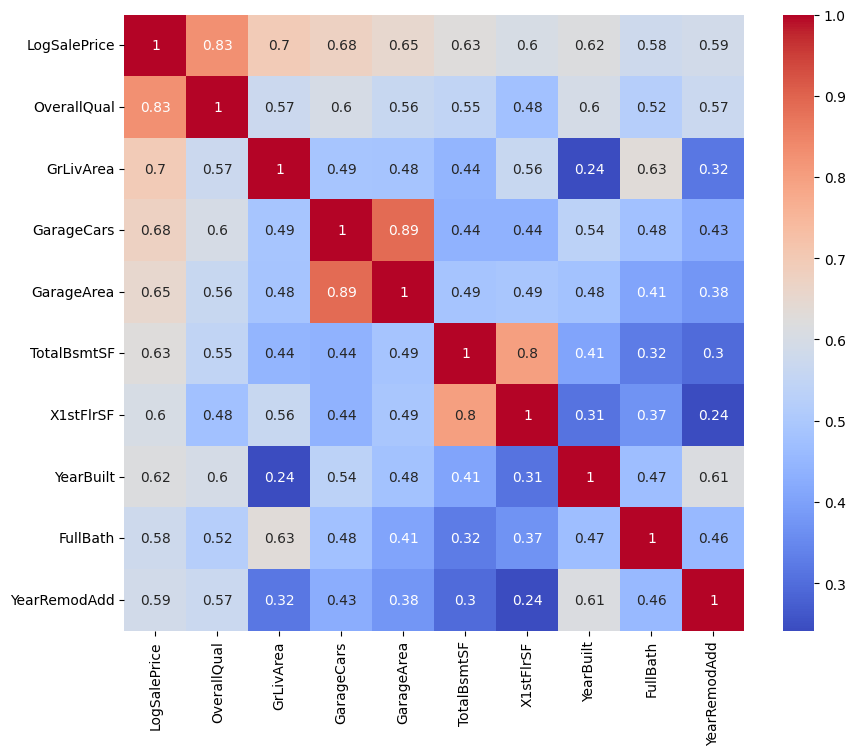

In [16]:
# Heatmap of top features
plt.figure(figsize=(10,8))
sns.heatmap(data[top_features].corr(), annot=True, cmap='coolwarm')

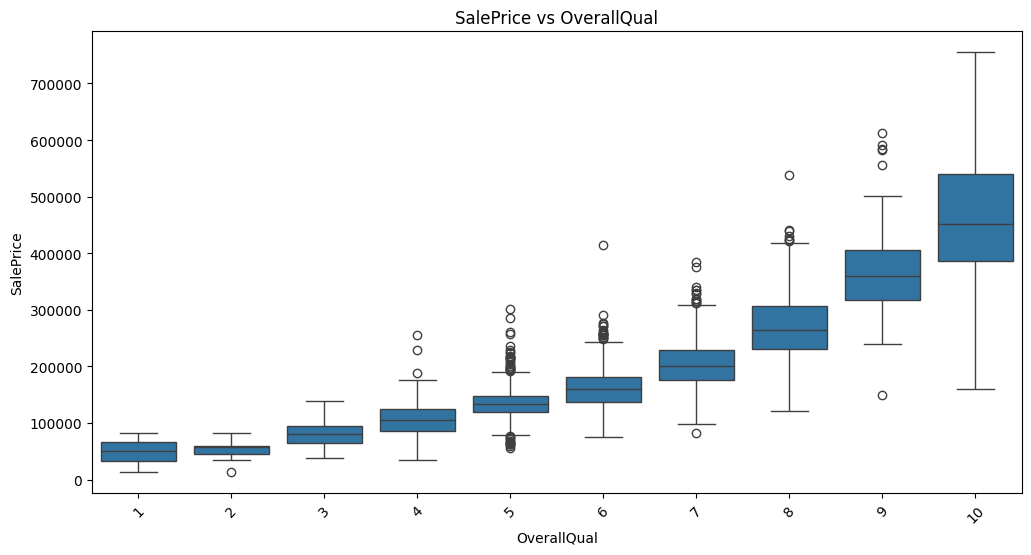

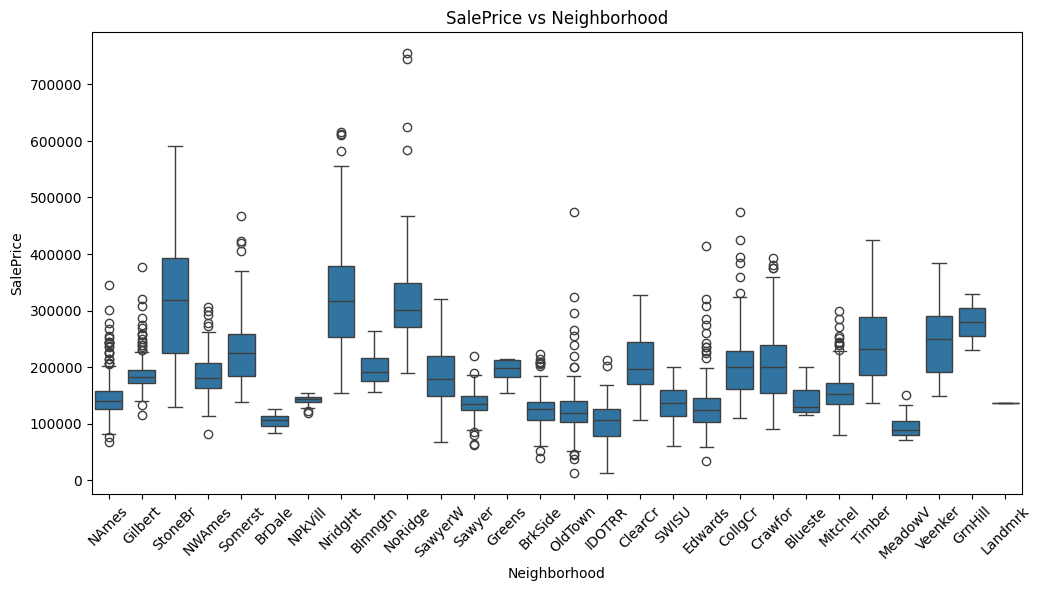

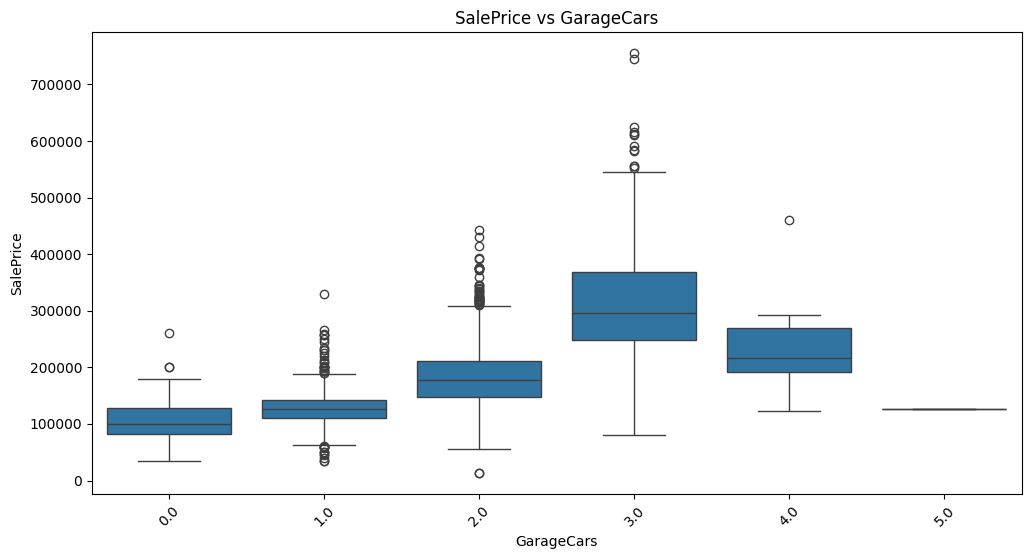

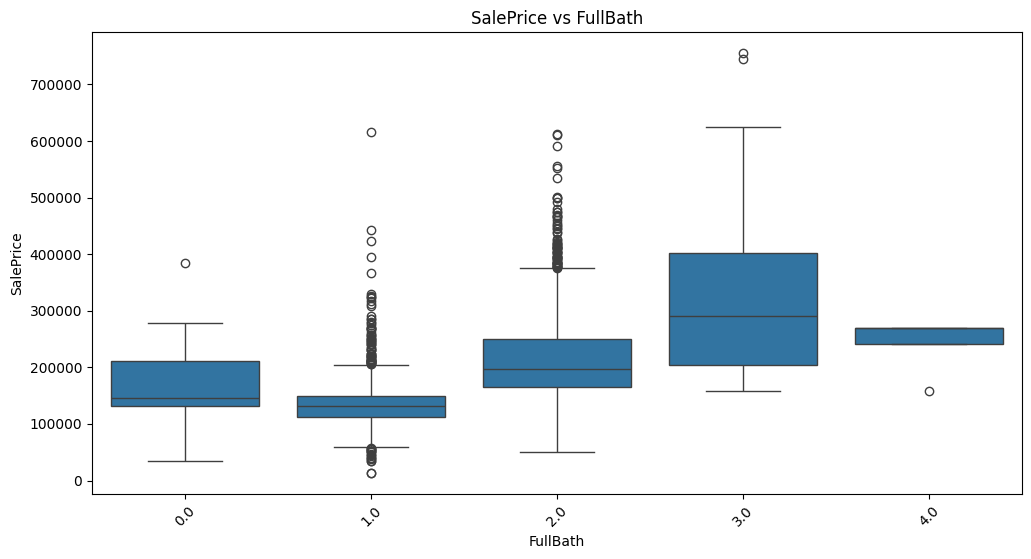

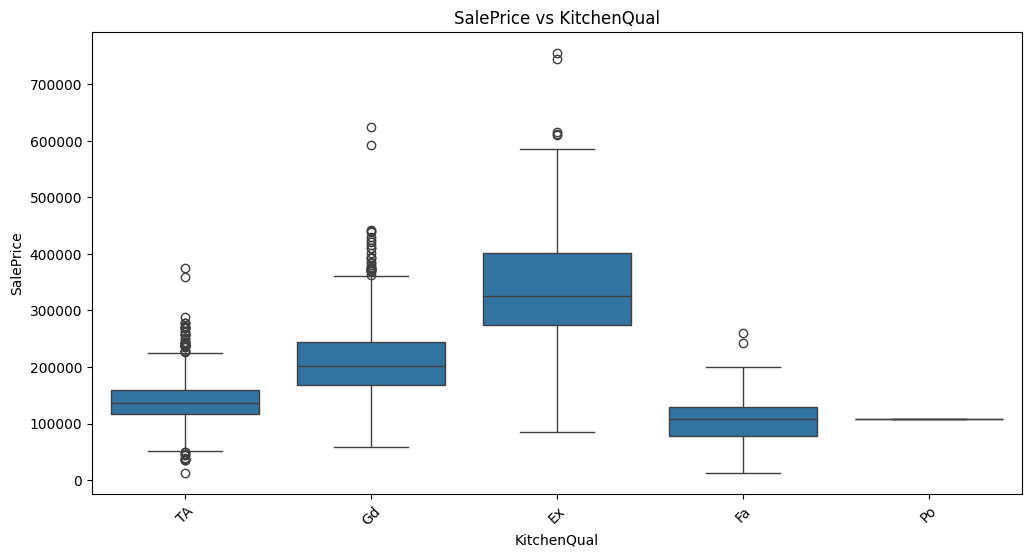

In [17]:
# List of categorical features to analyze
categorical_features = ['OverallQual', 'Neighborhood', 'GarageCars', 'FullBath', 'KitchenQual']

# Box plots of SalePrice vs categorical features
for feature in categorical_features:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=feature, y='SalePrice', data=data)
    plt.title(f'SalePrice vs {feature}')
    plt.xticks(rotation=45)
    plt.show()


#### Observations:

- **OverallQual**: There is a clear increasing trend of `SalePrice` with higher quality ratings.
- **Neighborhood**: Certain neighborhoods have higher median house prices.
- **GarageCars**: Houses with more garage spaces tend to have higher `SalePrice`.
- **FullBath**: Houses with more full bathrooms generally have higher `SalePrice`.
- **KitchenQual**: Better kitchen quality is associated with higher `SalePrice`.

## Missing Value Treatment

Let's handle missing values for features that are important.

In [18]:
# Filling missing numerical values with median

categorical_cols = ['GarageCars', 'GarageArea','BsmtHalfBath', 'BsmtFullBath']

for var in categorical_cols:
    data[var] = data[var].fillna(data[var].median())


# Filling missing categorical values with mode
data1 = data.copy()
data1['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
0,20,RL,141.0,31770.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,...,NoPool,NoFence,NaN,0.0,5.0,2010.0,WD,Normal,215000.0,12.278393
1,20,RH,80.0,11622.0,Pave,NoAccess,Reg,Lvl,AllPub,Inside,...,NoPool,MnPrv,NaN,0.0,6.0,2010.0,WD,Normal,105000.0,11.561716
2,20,RL,81.0,14267.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,...,NoPool,NoFence,Gar2,12500.0,6.0,2010.0,WD,Normal,172000.0,12.055250
3,20,RL,93.0,11160.0,Pave,NoAccess,Reg,Lvl,AllPub,Corner,...,NoPool,NoFence,NaN,0.0,4.0,2010.0,WD,Normal,244000.0,12.404924
4,60,RL,74.0,13830.0,Pave,NoAccess,IR1,Lvl,AllPub,Inside,...,NoPool,MnPrv,NaN,0.0,3.0,2010.0,WD,Normal,189900.0,12.154253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937.0,Pave,NoAccess,IR1,Lvl,AllPub,CulDSac,...,NoPool,GdPrv,NaN,0.0,3.0,2006.0,WD,Normal,142500.0,11.867097
2926,20,RL,NaN,8885.0,Pave,NoAccess,IR1,Low,AllPub,Inside,...,NoPool,MnPrv,NaN,0.0,6.0,2006.0,WD,Normal,131000.0,11.782953
2927,85,RL,62.0,10441.0,Pave,NoAccess,Reg,Lvl,AllPub,Inside,...,NoPool,MnPrv,Shed,700.0,7.0,2006.0,WD,Normal,132000.0,11.790557
2928,20,RL,77.0,10010.0,Pave,NoAccess,Reg,Lvl,AllPub,Inside,...,NoPool,NoFence,NaN,0.0,4.0,2006.0,WD,Normal,170000.0,12.043554


Or, we add a new level corresponding to whether the variable is missing from that observation. We'll do this via dummy encoding as usual.

In [19]:
# categorical ones:
categorical_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'Electrical', 'GarageFinish', 'GarageQual', 'GarageCond']

for var in categorical_cols:
    print(var, data[var].dtype)
    data.loc[(data[var]).isna(), [var]] = 'NaN'

data[categorical_cols]=data[categorical_cols].astype('category')

MasVnrType object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinType2 object
Electrical object
GarageFinish object
GarageQual object
GarageCond object


In [20]:
print(np.sum(data.isnull().any()))

8


## Remove outliers

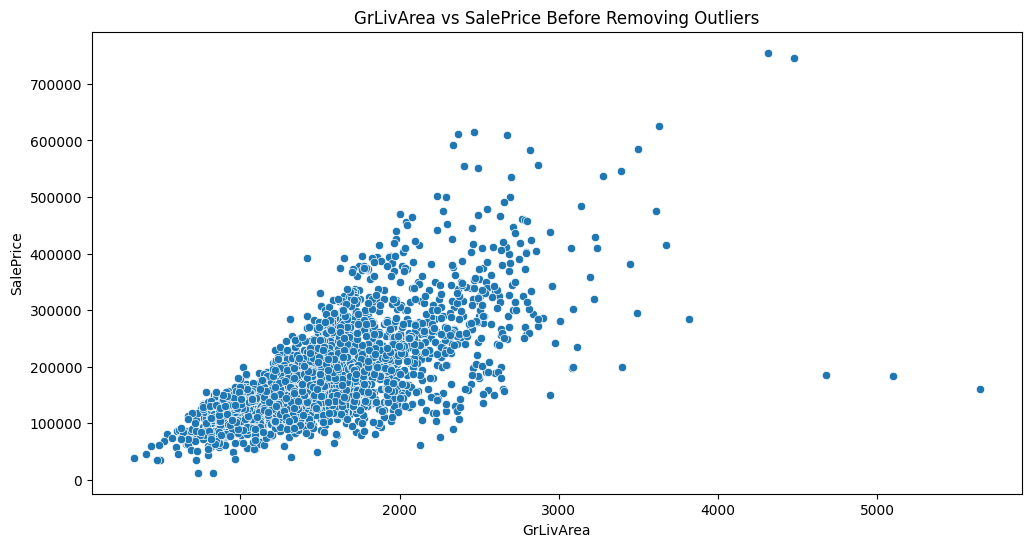

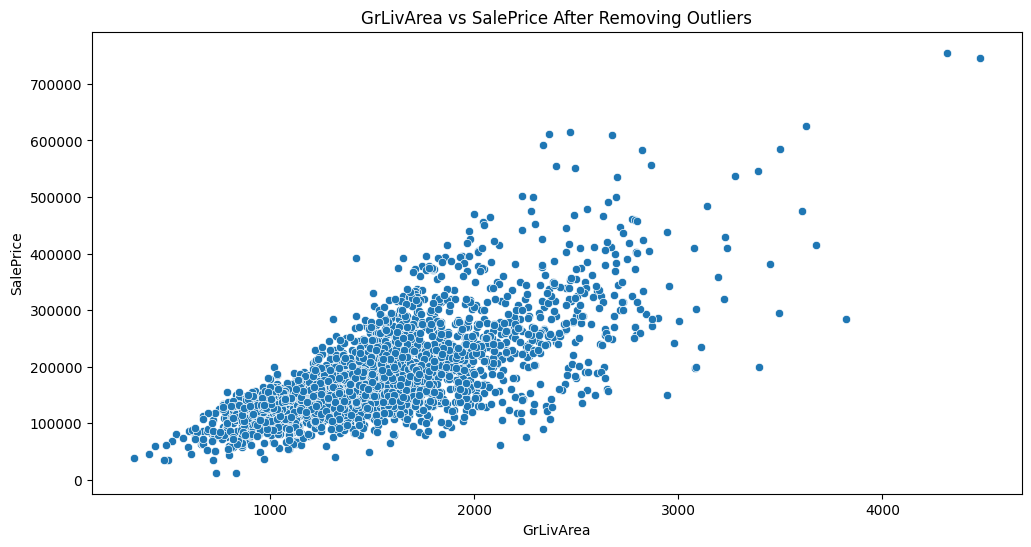

In [21]:
# Plotting GrLivArea vs SalePrice before removing outliers
plt.figure(figsize=(12,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title('GrLivArea vs SalePrice Before Removing Outliers')
plt.show()

# Removing outliers
data = data[data['GrLivArea'] < 4500]

# Plotting after removing outliers
plt.figure(figsize=(12,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title('GrLivArea vs SalePrice After Removing Outliers')
plt.show()


# Transform data format

<Axes: xlabel='GarageCars', ylabel='LogSalePrice'>

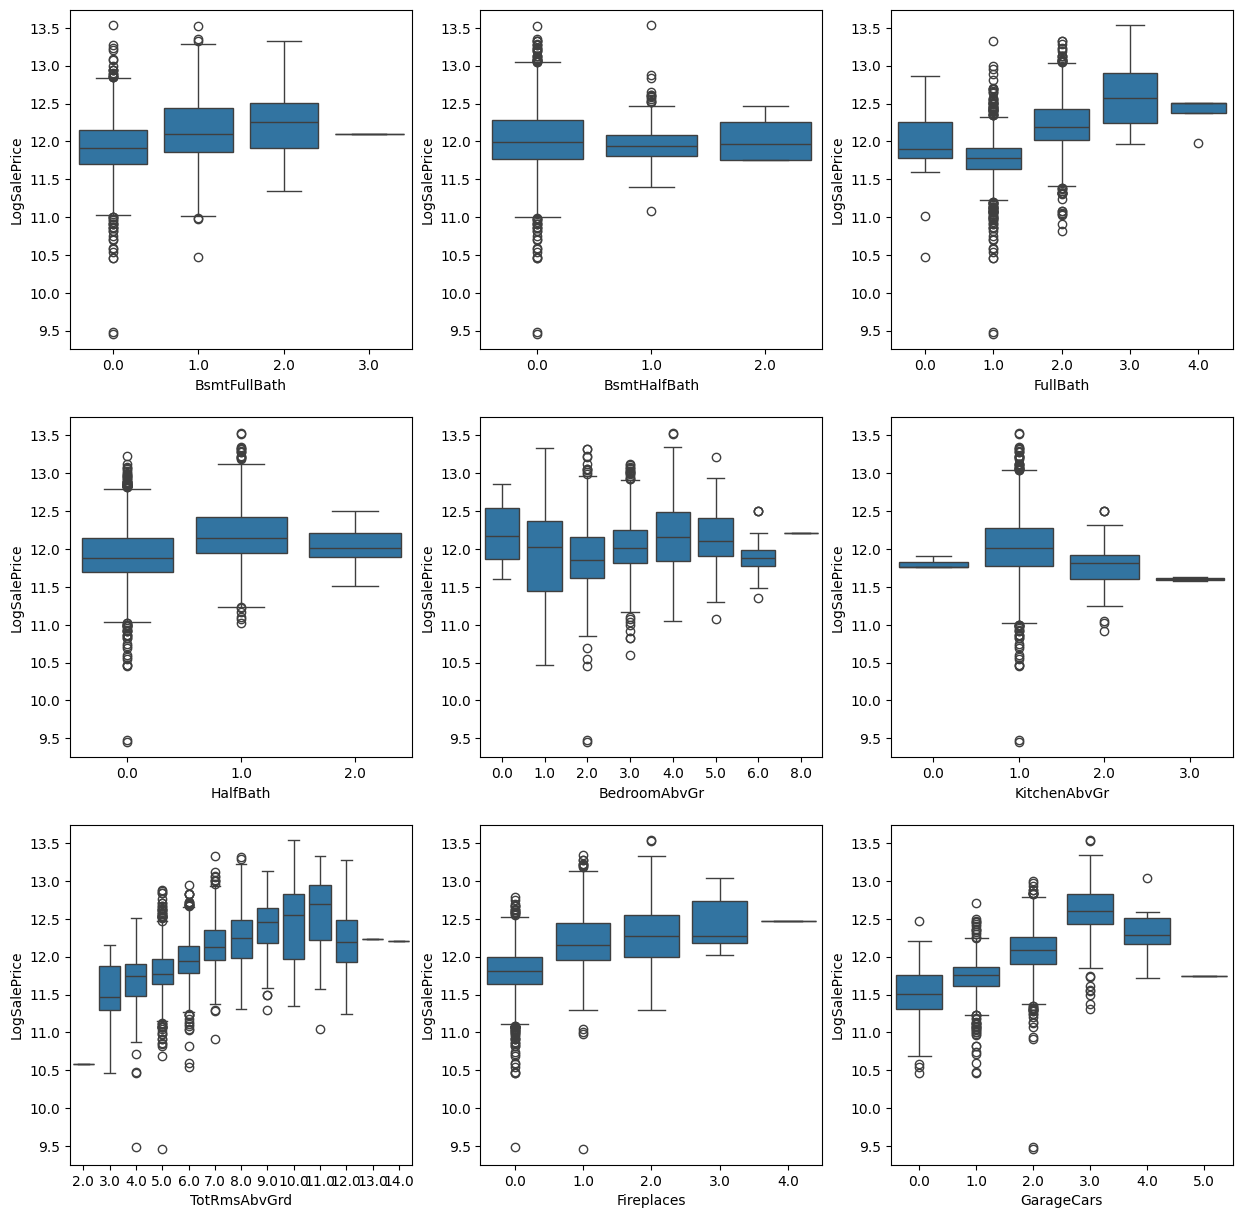

In [22]:
fig, axs=plt.subplots(3,3, figsize=(15,15))
sns.boxplot(data, x="BsmtFullBath", y="LogSalePrice", ax= axs[0,0])
sns.boxplot(data, x="BsmtHalfBath", y="LogSalePrice", ax= axs[0,1])
sns.boxplot(data, x="FullBath", y="LogSalePrice", ax= axs[0,2])
sns.boxplot(data, x="HalfBath", y="LogSalePrice", ax= axs[1,0])
sns.boxplot(data, x="BedroomAbvGr", y="LogSalePrice", ax= axs[1,1])
sns.boxplot(data, x="KitchenAbvGr", y="LogSalePrice", ax= axs[1,2])
sns.boxplot(data, x="TotRmsAbvGrd", y="LogSalePrice", ax= axs[2,0])
sns.boxplot(data, x="Fireplaces", y="LogSalePrice", ax= axs[2,1])
sns.boxplot(data, x="GarageCars", y="LogSalePrice", ax= axs[2,2])

# In-class activity: Should we keep the above columns as integers or categorical variables? How to convert them to categorical variables?

In [ ]:
# these are categorical variables
data[
    ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
     'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']] = data[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                                          'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']].astype('category')
